In [13]:
from imports import *

In [14]:
file_path = '/data/vidales/opana_tree_combined_v2609.root'
file = uproot.open(file_path)
optree = file['opanatree']['OpAnaTree'] # Tree con número de fotoelectrones
print("Keys in optree:", optree.keys())

Keys in optree: ['eventID', 'runID', 'subrunID', 'nuvX', 'nuvY', 'nuvZ', 'nuvT', 'nuvE', 'stepX', 'stepY', 'stepZ', 'stepT', 'dE', 'energydep', 'energydepX', 'energydepY', 'energydepZ', 'E', 'StartPx', 'StartPy', 'StartPz', 'EndPx', 'EndPy', 'EndPz', 'process', 'trackID', 'motherID', 'PDGcode', 'InTimeCosmics', 'InTimeCosmicsTime', 'dEtpc', 'dEpromx', 'dEpromy', 'dEpromz', 'dEspreadx', 'dEspready', 'dEspreadz', 'dElowedges', 'dEmaxedges', 'nopflash', 'flash_id', 'flash_time', 'flash_total_pe', 'flash_pe_v', 'flash_tpc', 'flash_y', 'flash_yerr', 'flash_z', 'flash_zerr', 'flash_x', 'flash_xerr', 'flash_ophit_time', 'flash_ophit_risetime', 'flash_ophit_starttime', 'flash_ophit_amp', 'flash_ophit_area', 'flash_ophit_width', 'flash_ophit_pe', 'flash_ophit_ch']


In [15]:
# Load variables to be predicted and associated data in a single step
hit_nuvT, hit_PE, hit_ch, hit_t = (optree[key].array() for key in ['nuvT', 'flash_ophit_pe', 'flash_ophit_ch', 'flash_ophit_time'])


# Filter out subarrays with more than one neutrino interaction
hit_nuvT_filtered, hit_PE_filtered, hit_ch_filtered, hit_t_filtered = zip(*[
    (subarray_nuvT, subarray_PE, subarray_ch, subarray_t) 
    for subarray_nuvT, subarray_PE, subarray_ch, subarray_t in zip(hit_nuvT, hit_PE, hit_ch, hit_t)
    if len(subarray_nuvT) ==1
])

Flash time distribution chosed is from [0us,2us] in opana_tree_combined_v2609 and opana_tree_combined_v2609_2. There's a peak in 10us. It probably require make another data set.

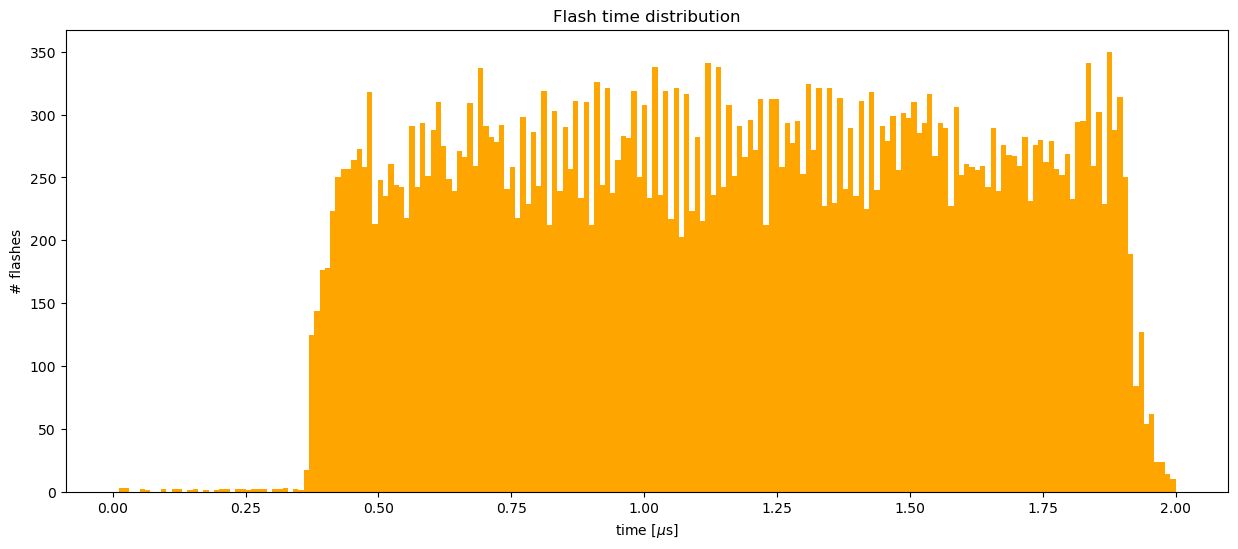

In [3]:
flash_time_flattened = ak.flatten(optree['flash_time'].array(), axis=None)
plot_flash_time_distribution(flash_time_flattened,bins=200)

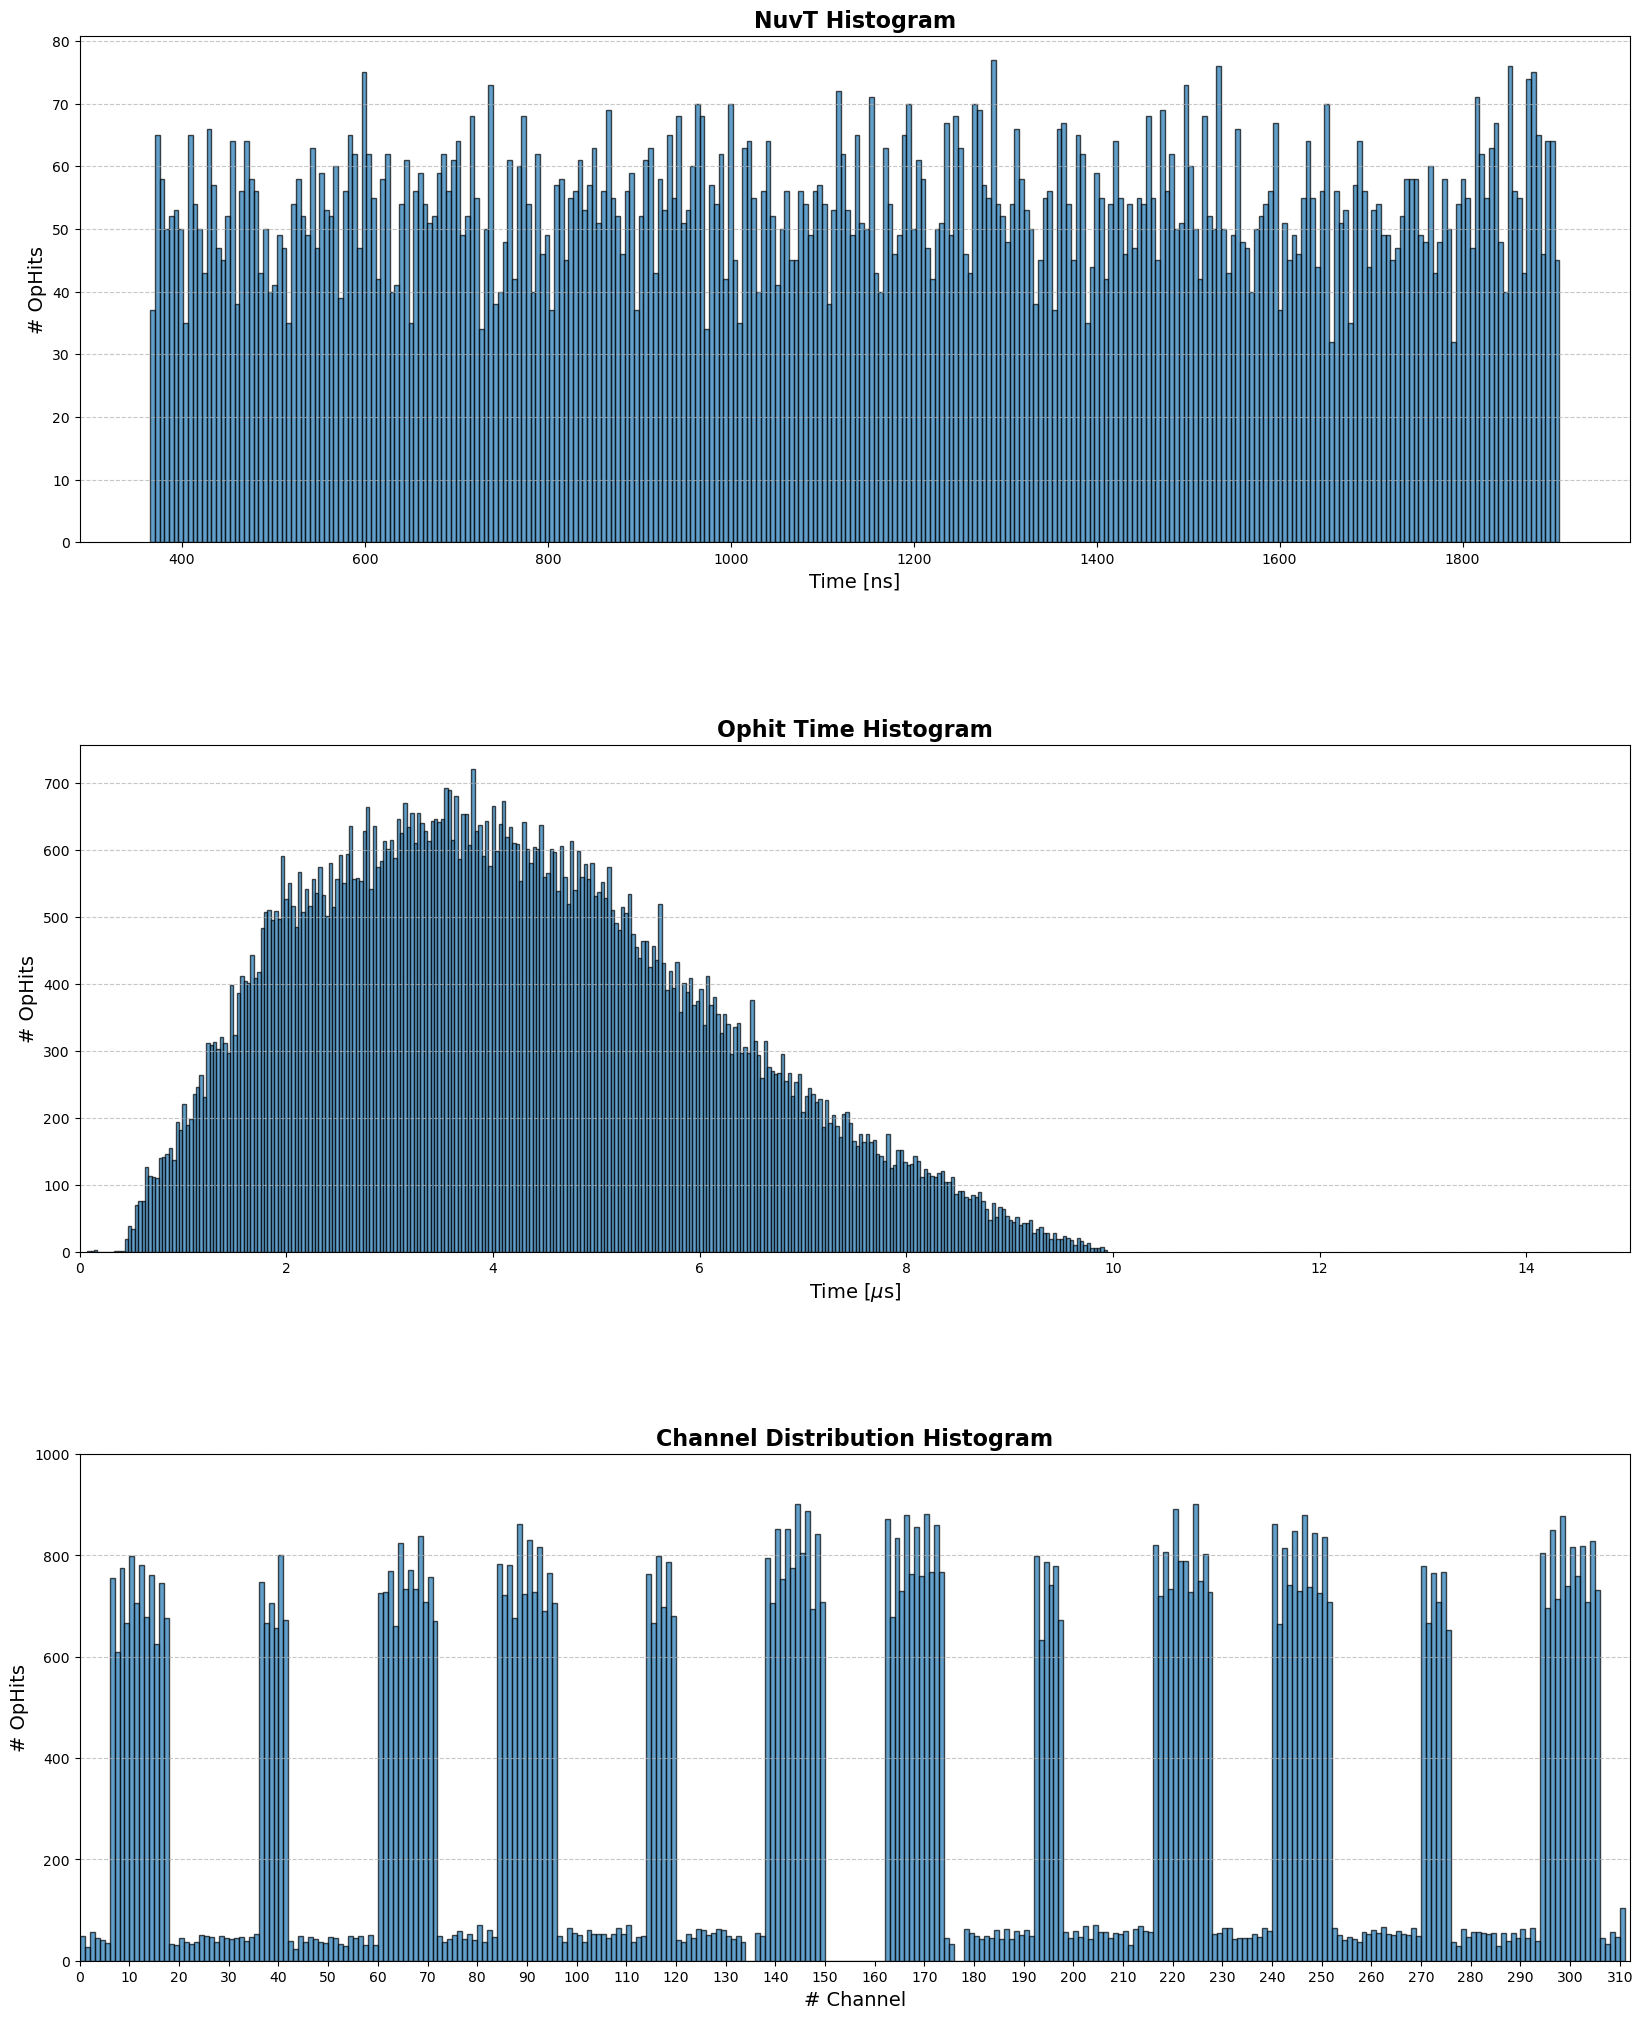

In [4]:
plot_variable_histograms(hit_nuvT, hit_t, hit_ch)

In [5]:
pe_matrix = np.loadtxt('saved_archives/pe_matrix_&_time_matrix/pe_matrix.csv', delimiter=",")
time_matrix = np.loadtxt('saved_archives/pe_matrix_&_time_matrix/time_matrix.csv', delimiter=",")

In [6]:
pe_matrix_sum = np.sum(pe_matrix, axis=0)
time_matrix_sum = np.sum(time_matrix, axis=0)

In [7]:
pe_matrix_mean = np.mean(pe_matrix, axis=0)
time_matrix_mean = np.mean(time_matrix, axis=0)

In [10]:
pe_matrix_std_mean= np.std(pe_matrix, axis=0)/np.sqrt(pe_matrix.shape[0])
time_matrix_std_mean= np.std(time_matrix, axis=0)/np.sqrt(time_matrix.shape[0])

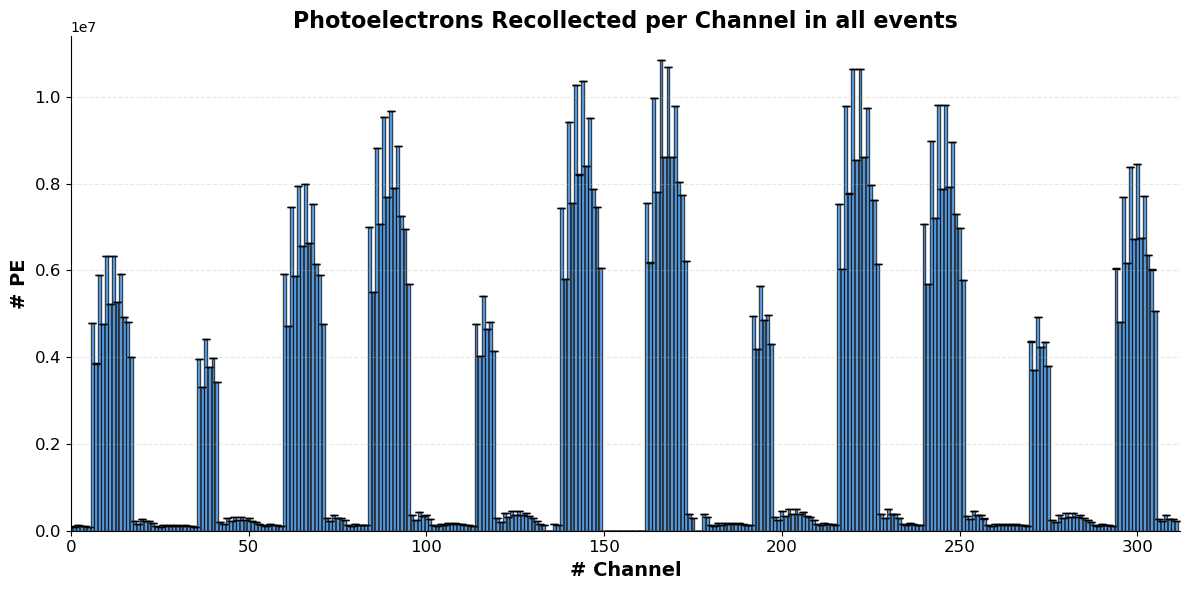

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(pe_matrix_sum)), pe_matrix_sum, yerr=pe_matrix_std, capsize=3,
        color='dodgerblue', edgecolor='black', alpha=0.7)

# Axis labels and title with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel('# PE', fontsize=14, weight='bold')
plt.title('Photoelectrons Recollected per Channel in all events', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light gridlines
plt.gca().spines['top'].set_visible(False)  # Hide top border
plt.gca().spines['right'].set_visible(False)  # Hide right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

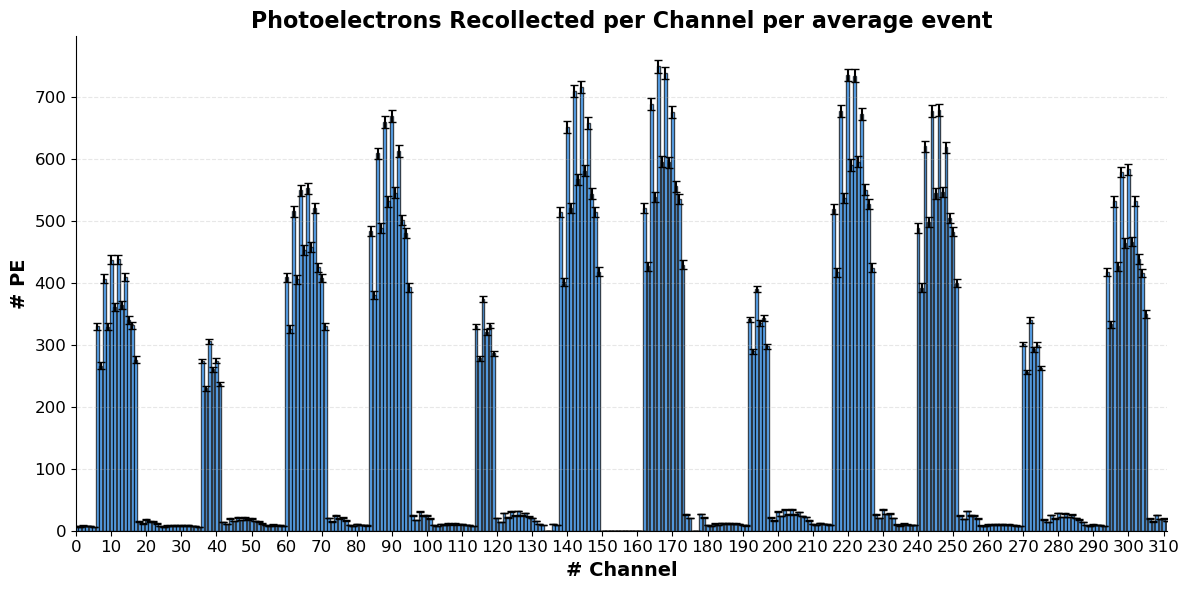

In [34]:
plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(pe_matrix_mean)), pe_matrix_mean, yerr=pe_matrix_std_mean, capsize=3, ecolor='black',
        color='dodgerblue', edgecolor='black', alpha=0.7)

# Axis labels and title with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel('# PE', fontsize=14, weight='bold')
plt.title('Photoelectrons Recollected per Channel per average event', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 311)
plt.xticks(range(0, 312, 10), fontsize=12)  # Set x-ticks with a step of 10 for clarity
plt.yticks(fontsize=12)



# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light gridlines
plt.gca().spines['top'].set_visible(False)  # Hide top border
plt.gca().spines['right'].set_visible(False)  # Hide right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

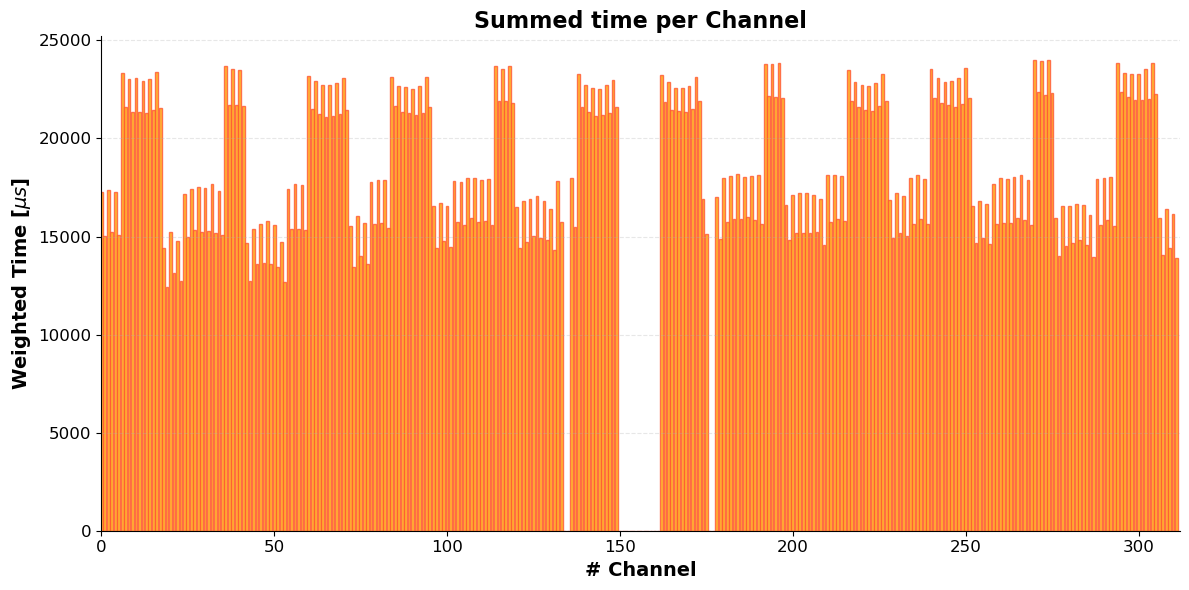

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(tiempos_sums)), tiempos_sums, 
        color='orange', edgecolor='#FF5733', alpha=0.8)  # Adjusting transparency

# Axis labels with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel(r'Weighted Time [$\mu s$]', fontsize=14, weight='bold')
plt.title('Summed time per Channel', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light dashed gridlines on the y-axis
plt.gca().spines['top'].set_visible(False)  # Hide the top border
plt.gca().spines['right'].set_visible(False)  # Hide the right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


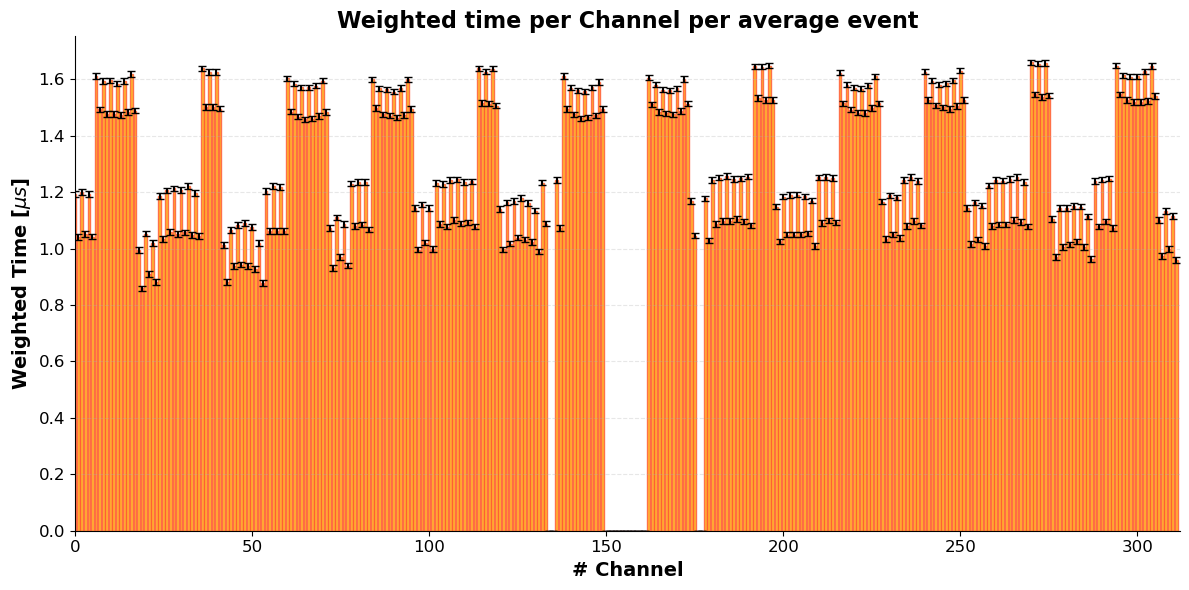

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(time_matrix_mean)), time_matrix_mean, yerr=time_matrix_std_mean, capsize=3, ecolor='black',
        color='orange', edgecolor='#FF5733', alpha=0.8)  # Adjusting transparency

# Axis labels with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel(r'Weighted Time [$\mu s$]', fontsize=14, weight='bold')
plt.title('Weighted time per Channel per average event', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light dashed gridlines on the y-axis
plt.gca().spines['top'].set_visible(False)  # Hide the top border
plt.gca().spines['right'].set_visible(False)  # Hide the right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [16]:
# Flatten the data
num_events, num_channels = pe_matrix.shape
pe_values = pe_matrix.flatten()  # All PE values
weightedt_values = time_matrix.flatten()
channel_indices = np.tile(np.arange(num_channels), num_events)  # y-axis

In [17]:
total_elements = pe_matrix.size

# Step 2: Count the number of zeros in the matrix
num_zeros = np.count_nonzero(pe_matrix == 0)

# Step 3: Calculate the percentage of zeros
percentage_zeros = (num_zeros / total_elements) * 100

print(f'Percentage of zeros in the matrix: {percentage_zeros:.2f}%')

Percentage of zeros in the matrix: 42.59%


In [54]:
# Step 2: Create a boolean mask for values <= 95th percentile

percentile_95 = np.percentile(pe_values, 95)
mask = (pe_values !=0) & (pe_values <= percentile_95)

# Step 3: Filter the vectors
filtered_pe_values = pe_values[mask]
filtered_channel_indices = channel_indices[mask]
filtered_weightedt_values=weightedt_values[mask]

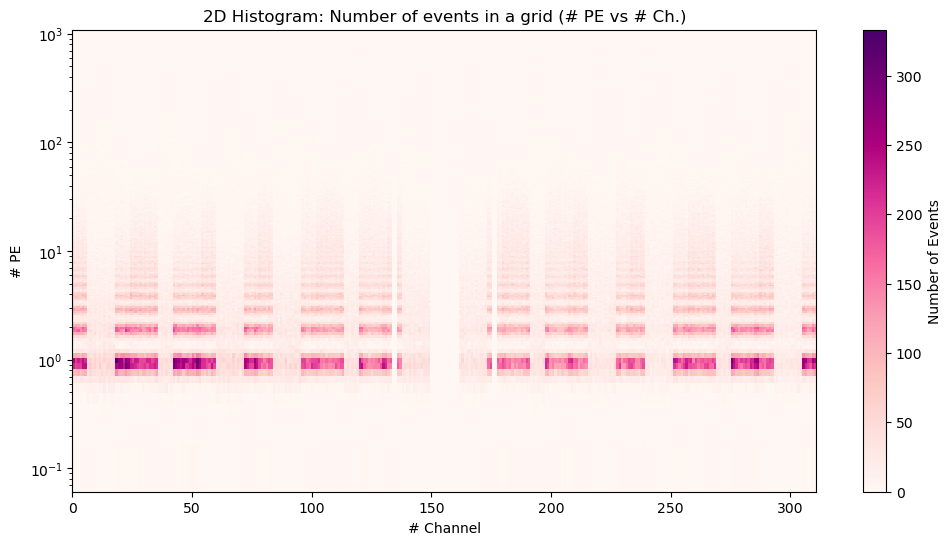

In [57]:
# Create the 2D histogram
plt.figure(figsize=(12, 6))
plt.hist2d(filtered_channel_indices, filtered_pe_values, bins=[312,10000], cmap='RdPu')

# Add color bar and labels
plt.colorbar(label='Number of Events')
plt.xlabel('# Channel')
plt.ylabel('# PE')
plt.title('2D Histogram: Number of events in a grid (# PE vs # Ch.)')

plt.yscale('log')

# Show the plot
plt.show()

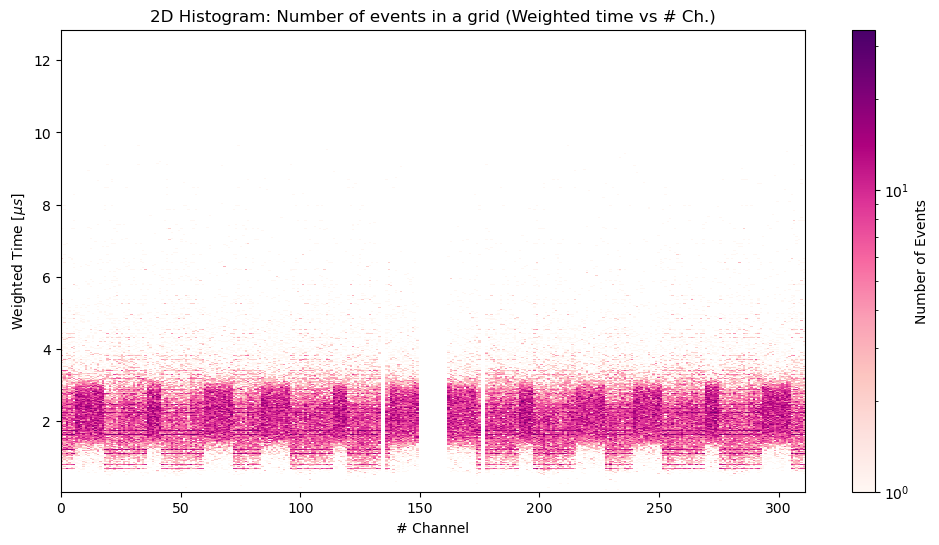

In [71]:
from matplotlib.colors import LogNorm
# Create the 2D histogram
plt.figure(figsize=(12, 6))
plt.hist2d(filtered_channel_indices, filtered_weightedt_values, bins=[312, 6000], cmap='RdPu',norm=LogNorm())

# Add color bar and labels
plt.colorbar(label='Number of Events')
plt.xlabel('# Channel')
plt.ylabel(r'Weighted Time [$\mu s$]')
plt.title('2D Histogram: Number of events in a grid (Weighted time vs # Ch.)')


# Show the plot
plt.show()

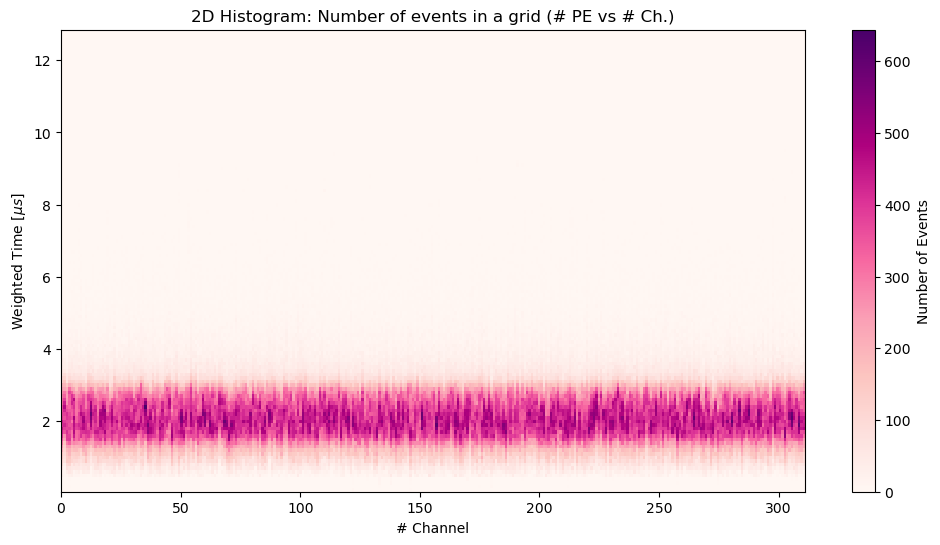

In [49]:
# Create the 2D histogram
plt.figure(figsize=(12, 6))
plt.hist2d(filtered_channel_indices, filtered_weightedt_values, bins=[312, int(np.max(filtered_weightedt_values)*10)], cmap='RdPu')

# Add color bar and labels
plt.colorbar(label='Number of Events')
plt.xlabel('# Channel')
plt.ylabel(r'Weighted Time [$\mu s$]')
plt.title('2D Histogram: Number of events in a grid (# PE vs # Ch.)')
#plt.ylim(0,10)

# Show the plot
plt.show()

Relaciones entre detectores para matchear con eficiencia

0: coated pmt, 1: uncoated pmt, 2: vuv XAs, 3: vis XAs

In [5]:
PDSMap = file['opanatree']['PDSMapTree']
ID = PDSMap['OpDetID'].array()
Type = PDSMap['OpDetType'].array()
detector_dict = {id_val: (int(type_val)) for id_val, type_val in zip(ID[0], Type[0])}

In [10]:
pe_matrix = np.loadtxt('saved_archives/pe_matrix_&_time_matrix/pe_matrix.csv', delimiter=",")
time_matrix = np.loadtxt('saved_archives/pe_matrix_&_time_matrix/time_matrix.csv', delimiter=",")

In [11]:
pe_matrix_mean = np.mean(pe_matrix, axis=0)
time_matrix_mean = np.mean(time_matrix, axis=0)

In [13]:
print(detector_dict)

{0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 3, 25: 3, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2, 52: 2, 53: 2, 54: 3, 55: 3, 56: 3, 57: 3, 58: 3, 59: 3, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 3, 103: 3, 104: 3, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 3, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 2, 131: 2, 132: 3, 133: 3, 134: 3, 135: 3, 136: 3, 137: 3, 138: 

In [28]:
# Initialize lists to store indices for detector types 0 and 1
channels_with_coatedpmt = []
channels_with_uncoatedpmt = []
channels_with_vuvxas = []
channels_with_visxas = []

# Iterate through the dictionary to find indices
for channel, detector_type in detector_dict.items():
    if detector_type == 0:
        channels_with_coatedpmt.append(channel)
    elif detector_type == 1:
        channels_with_uncoatedpmt.append(channel)
    elif detector_type == 2:
        channels_with_vuvxas.append(channel)
    elif detector_type == 3:
        channels_with_visxas.append(channel)

In [92]:
channels_with_pmt = channels_with_coatedpmt + channels_with_uncoatedpmt
channels_with_xas = channels_with_vuvxas + channels_with_visxas

In [96]:
pe_values_coatedpmt = [pe_matrix_mean[channel] for channel in channels_with_coatedpmt if pe_matrix_mean[channel] != 0]
pe_values_uncoatedpmt = [pe_matrix_mean[channel] for channel in channels_with_uncoatedpmt if pe_matrix_mean[channel] != 0]
pe_values_vuvxas = [pe_matrix_mean[channel] for channel in channels_with_vuvxas if pe_matrix_mean[channel] != 0]
pe_values_visxas= [pe_matrix_mean[channel] for channel in channels_with_visxas if pe_matrix_mean[channel] != 0]

pe_values_pmt = [pe_matrix_mean[channel] for channel in channels_with_pmt if pe_matrix_mean[channel] != 0]
pe_values_xas = [pe_matrix_mean[channel] for channel in channels_with_xas if pe_matrix_mean[channel] != 0]

In [98]:
division = np.mean(pe_values_uncoatedpmt) / np.mean(pe_values_coatedpmt)*100
print(f'Relation of #PEs Uncoated PMTs vs. coated PMTs: {division:.2f}%')

Relation of #PEs Uncoated PMTs vs. coated PMTs: 59.42%


In [99]:
division = np.mean(pe_values_visxas) / np.mean(pe_values_vuvxas)*100
print(f'Relation of #PEs VIS XAs vs. Uncoated VUV XAs: {division:.2f}%')

Relation of #PEs VIS XAs vs. Uncoated VUV XAs: 42.42%


In [101]:
division = np.mean(pe_values_xas) / np.mean(pe_values_pmt)*100
print(f'Relation of #PEs XAs vs. PMTs: {division:.2f}%')

Relation of #PEs XAs vs. PMTs: 3.30%


superficie PMTs (aprox. 10 cm or 4-inch radius): 314 cm2
superficie XAs (7.5 cm×12.5 cm): 93.75 cm2
Area of PMTs/Area XAs: 3.35

In [103]:
even_pmt = [pe_values_pmt[i] for i in range(len(pe_values_pmt)) if i % 2 == 0]
odd_pmt = [pe_values_pmt[i] for i in range(len(pe_values_pmt)) if i % 2 != 0]

In [106]:
division = np.mean(odd_pmt) / np.mean(even_pmt)*100
print(f'Relation of odd PMTs vs. even PMTs: {division:.2f}%')

Relation of odd PMTs vs. even PMTs: 81.47%
